#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,precision_score,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [2]:
data=pd.read_csv('titanic_train.csv')

#### Print the data

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Checking Keys

In [4]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Checking Shape

In [5]:
data.shape

(891, 12)

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Checking datatypes

In [7]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Printing the info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Checking for null values

In [10]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Drawing heatmap

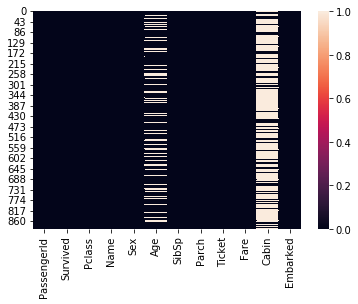

In [12]:
sns.heatmap(data.isnull())

#### Checking the skewness of the data

In [13]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

#### Removing insignificant columns

In [14]:
data.drop(['Cabin'],axis=1, inplace = True)

#### Filling age columns with mean values

In [15]:
data['Age'].fillna((data['Age'].mean()),inplace=True)

#### Dropping two rows of embarked columns

In [16]:
data.dropna(axis=0, thresh=None, subset=['Embarked'],inplace=True)

#### Checking null values again

In [17]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Preprocessing converting data from string to int

In [18]:
from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
data = data.apply(label.fit_transform)

In [19]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,0,2,108,1,28,1,0,522,18,2
1,1,1,0,190,0,52,1,0,595,207,0
2,2,1,2,353,0,34,0,0,668,41,2
3,3,1,0,272,0,48,1,0,48,189,2
4,4,0,2,15,1,48,0,0,471,43,2
...,...,...,...,...,...,...,...,...,...,...,...
886,884,0,1,547,1,35,0,0,100,85,2
887,885,1,0,303,0,24,0,0,14,153,2
888,886,0,2,412,0,39,1,2,674,131,2
889,887,1,0,81,1,34,0,0,8,153,0


#### Plotting count of Survived Passengers

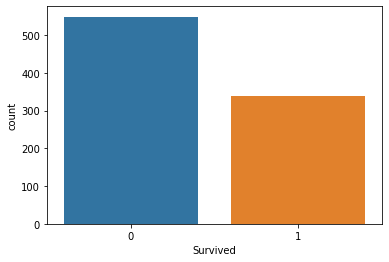

In [20]:
sns.countplot(data['Survived'])

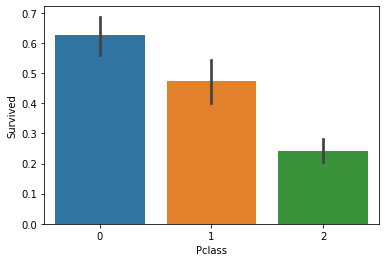

In [21]:
sns.barplot(x='Pclass',y='Survived',data=data)

#### Survival rate of passengers based on Sex in each class

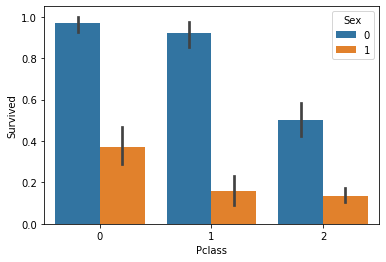

In [22]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=data)

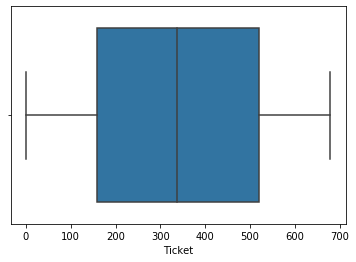

In [23]:
sns.boxplot(data['Ticket'])

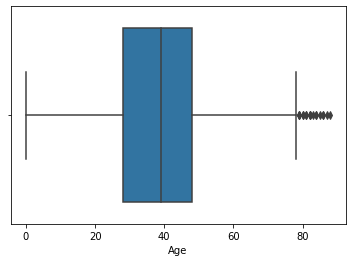

In [24]:
sns.boxplot(data['Age'])

## Outliers are present in Age Column

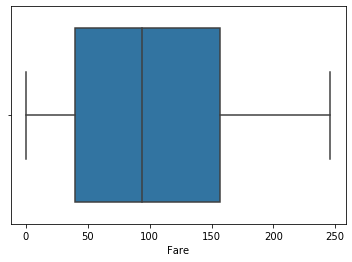

In [25]:
sns.boxplot(data['Fare'])

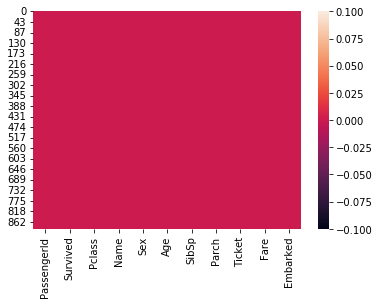

In [26]:
sns.heatmap(data.isnull())

#### Checking for the outliers

In [27]:
from scipy.stats import zscore
data['z']=zscore(data['Age'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,z
0,0,0,2,108,1,28,1,0,522,18,2,-0.671461
1,1,1,0,190,0,52,1,0,595,207,0,0.769091
2,2,1,2,353,0,34,0,0,668,41,2,-0.311323
3,3,1,0,272,0,48,1,0,48,189,2,0.528999
4,4,0,2,15,1,48,0,0,471,43,2,0.528999


In [28]:
data1= data.loc[data['z'].abs()<2]

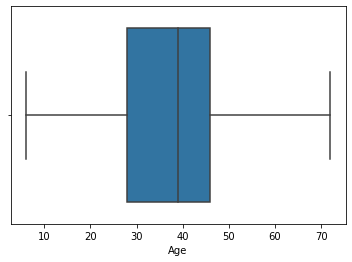

In [29]:
sns.boxplot(data1['Age'])

#### Checking skewness

In [30]:
data1.skew()

PassengerId    0.002429
Survived       0.500892
Pclass        -0.713764
Name           0.003906
Sex           -0.591534
Age            0.103233
SibSp          2.955056
Parch          2.848451
Ticket        -0.021647
Fare           0.411657
Embarked      -1.304074
z              0.103233
dtype: float64

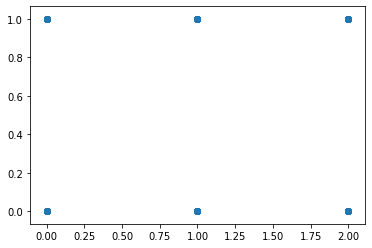

In [34]:
plt.scatter(data1['Pclass'],data1['Survived'])

#### Plotting pair plot

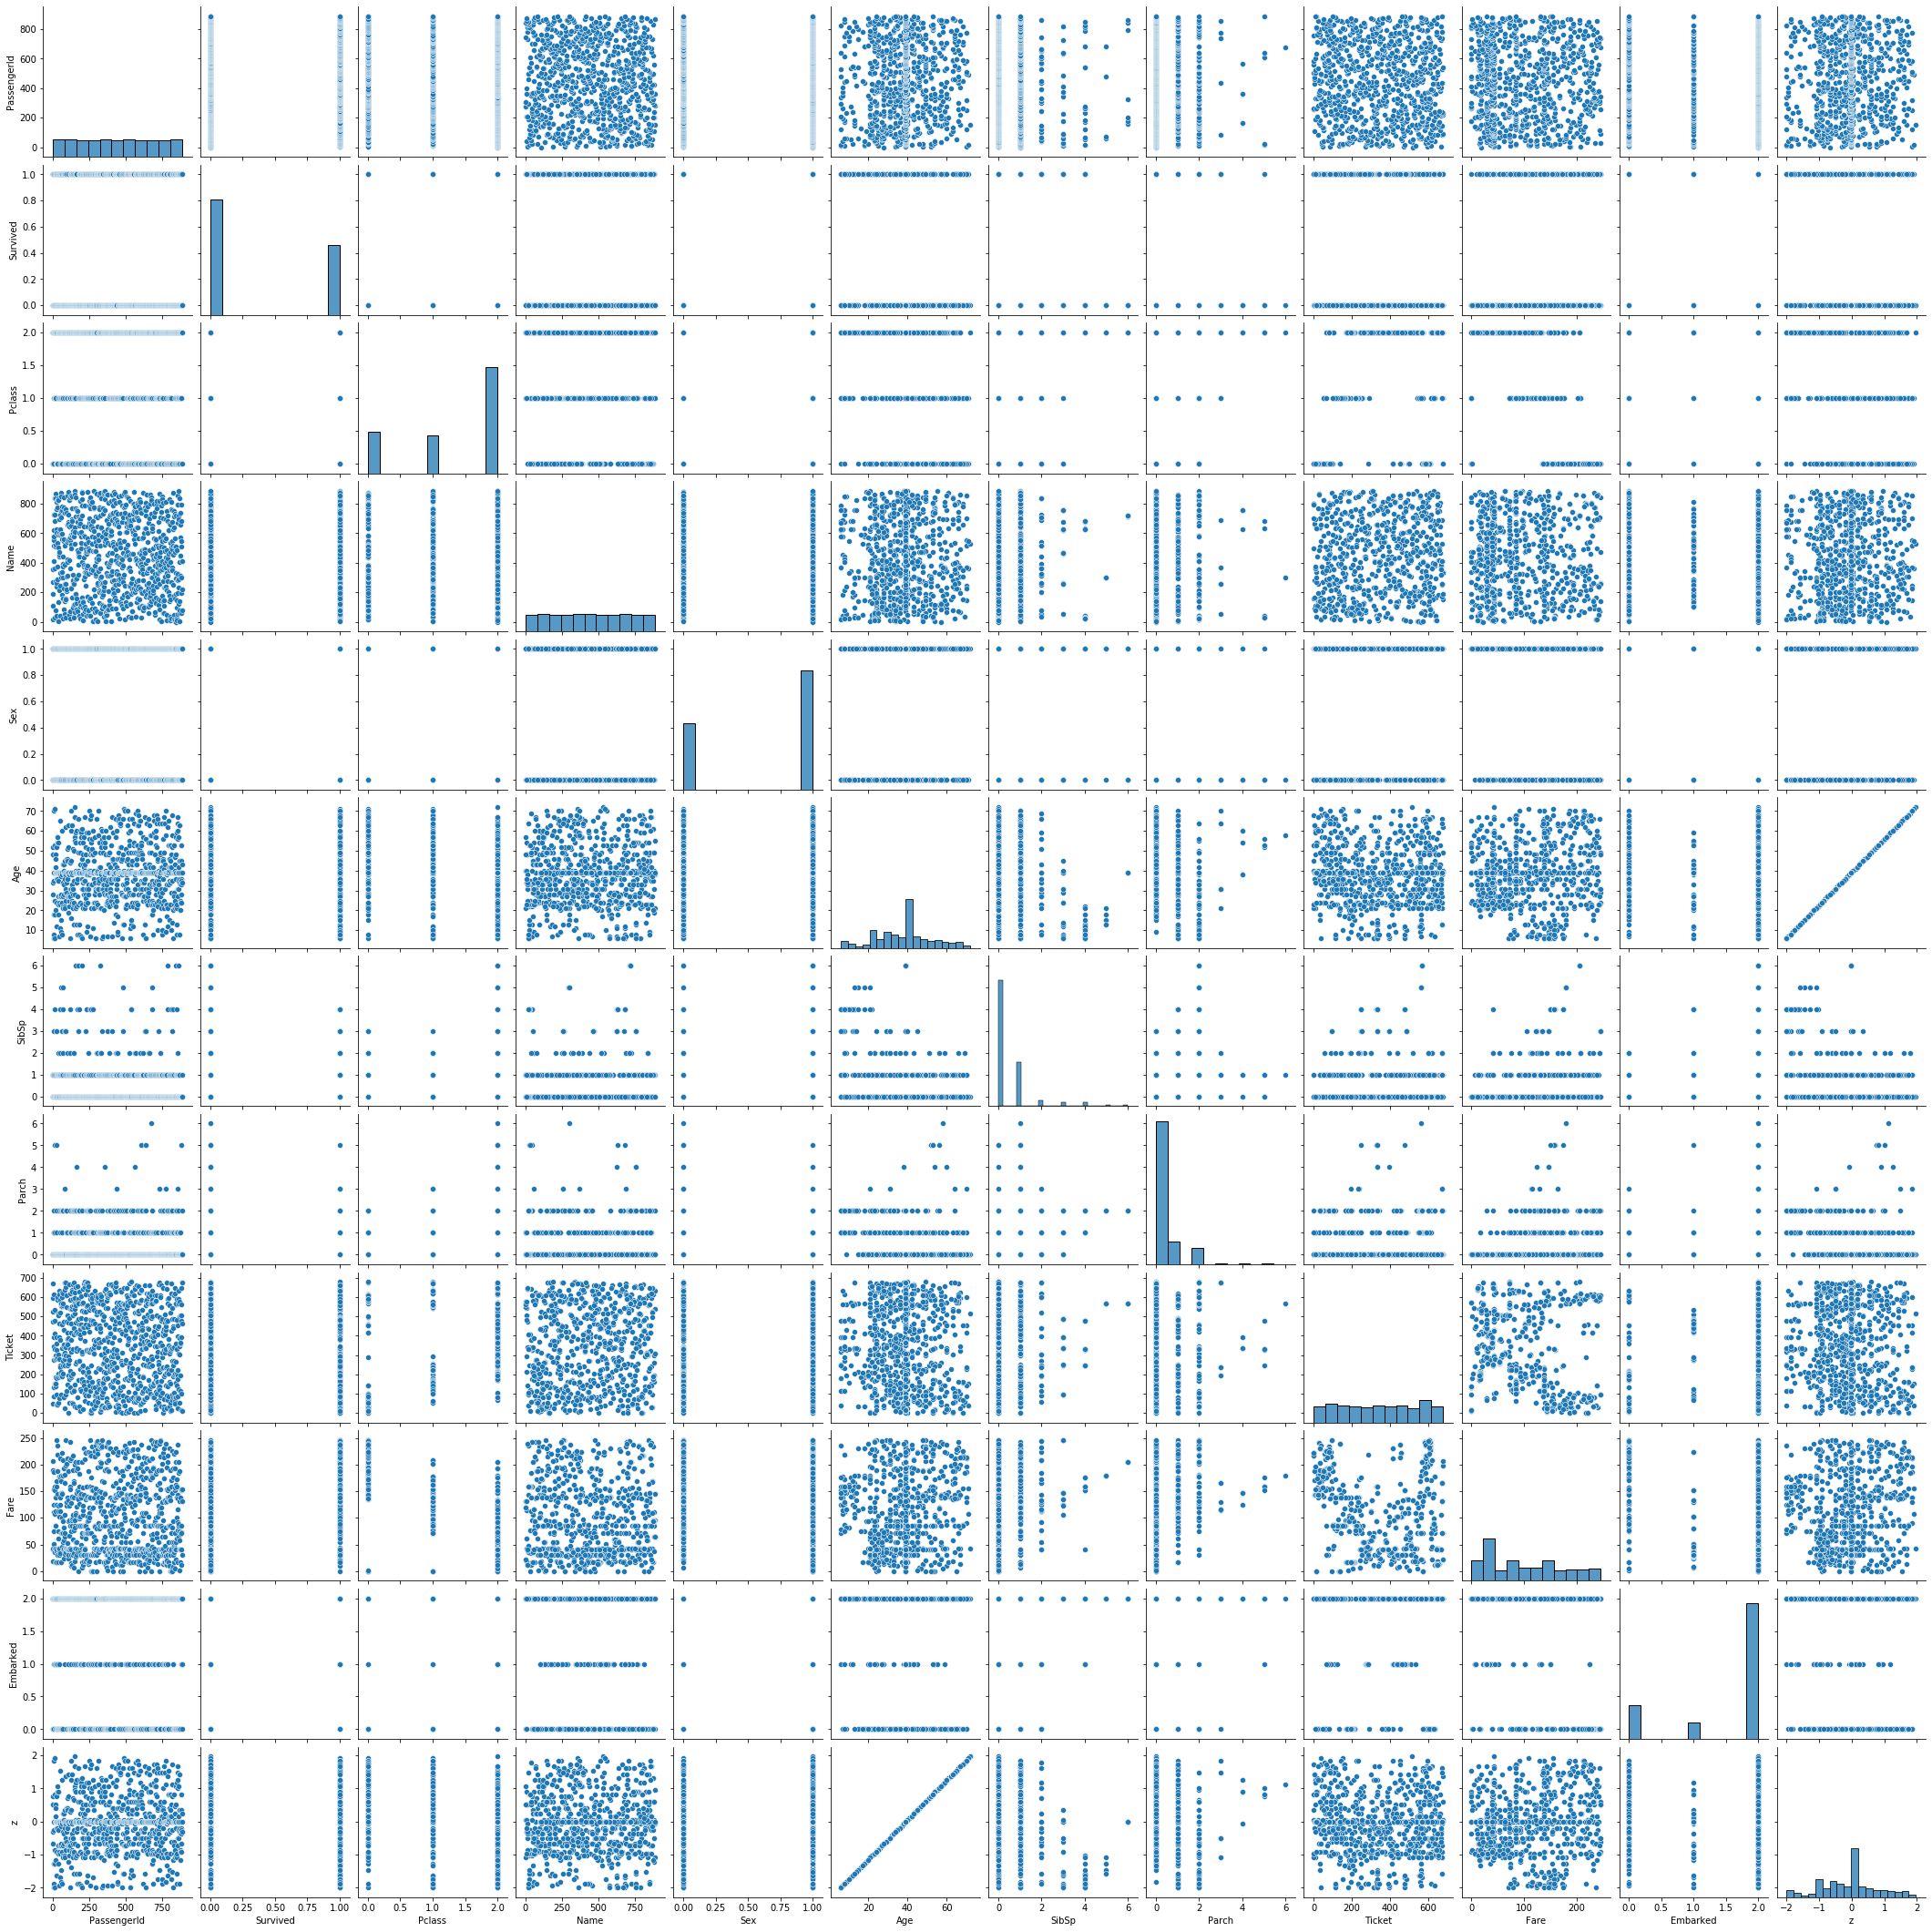

In [35]:
sns.pairplot(data1)

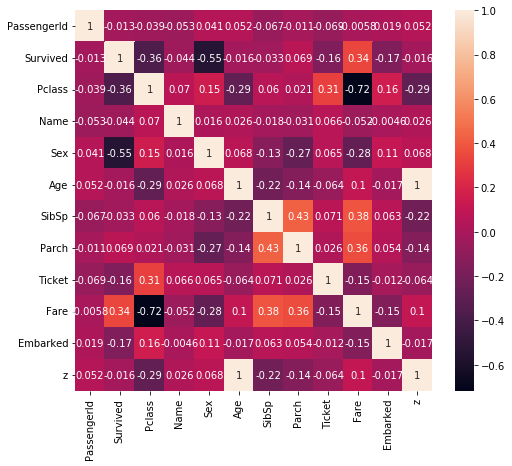

In [36]:
data1_hmap=data1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(data1_hmap,annot=True)
plt.show()

#### Training the Model

In [38]:
x=data1.iloc[:,2:11]
y=data1.iloc[:,1]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=30)

#### Checking the shape of Training Data

In [40]:
x_train.shape

(669, 9)

#### Checking the shape of Testing Data

In [41]:
x_test.shape

(168, 9)

In [42]:
y_train.shape

(669,)

In [43]:
y_test.shape

(168,)

#### Printing the values of Training and Testing data

In [44]:
x_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
371,2,861,1,23,1,0,243,6,2
344,1,262,1,49,0,0,111,85,2
370,0,328,1,33,1,0,57,191,0
617,2,487,0,34,1,0,535,109,2
704,2,326,1,34,1,0,397,36,2
...,...,...,...,...,...,...,...,...,...
148,1,579,1,50,0,2,112,138,2
531,2,816,1,39,0,0,180,17,0
866,1,230,0,35,1,0,631,89,0
446,1,528,0,17,0,1,161,117,2


In [45]:
x_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
79,2,223,0,40,0,0,431,81,2
766,0,109,1,39,0,0,18,174,0
156,2,287,0,21,0,0,417,27,1
390,0,144,1,49,1,2,32,231,2
806,0,34,1,53,0,0,12,0,2
...,...,...,...,...,...,...,...,...,...
628,2,96,1,34,0,0,368,40,2
844,2,189,1,22,0,0,263,54,2
145,1,585,1,24,1,1,557,169,2
151,0,642,0,28,1,0,35,203,2


In [46]:
y_train

371    0
344    0
370    1
617    0
704    0
      ..
148    0
531    0
866    1
446    1
858    1
Name: Survived, Length: 669, dtype: int64

In [47]:
y_test

79     1
766    0
156    1
390    1
806    0
      ..
628    0
844    0
145    0
151    1
210    0
Name: Survived, Length: 168, dtype: int64

#### Fitting 1st model with Linear Regression

In [48]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [49]:
model1.score(x_train,y_train)

0.42426751418713715

In [50]:
model1.score(x_test,y_test)

0.30864152935607814

In [51]:
y_pred1=model1.predict(x_test)

In [52]:
y_pred1

array([ 0.64088855,  0.57514939,  0.68590265,  0.3600185 ,  0.26832201,
        0.11486194,  0.39815412,  0.11193038,  0.70469985,  0.26167022,
        0.53059544,  0.6839938 ,  0.59392517,  0.95729872,  0.45773884,
        0.32198112,  0.53150071,  0.06724578,  0.64384337,  0.08611398,
        0.04154854,  0.91720064,  0.06280806,  0.2711914 ,  0.5060914 ,
        0.78638076, -0.05101235,  0.21289631,  0.08343771,  0.0984868 ,
        0.04064117,  0.62218321,  0.04573057,  0.30089809,  0.11530688,
        0.72331459,  0.89916603,  0.36196883,  0.69833334,  0.08739755,
        0.09450016,  0.05422333,  0.07807891,  0.21369325,  0.1117937 ,
        0.43184687,  0.61013844,  0.46939713,  0.10407845,  0.08561992,
        0.81222276,  0.23553726,  0.20352664,  0.10259019,  0.47814418,
        0.23437008,  0.7551769 ,  0.12454429,  0.87734846, -0.09553577,
        0.18013284, -0.00464321,  0.5617269 ,  0.11487158,  0.09802242,
        0.78186422,  0.16306211,  0.62182508,  1.03420812,  1.03

#### Identifying r2 score

In [53]:
r2_score(y_test,y_pred1)

0.30864152935607814

#### Calculating the errors

In [54]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred1)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  0.1598815454185402
root mean squared error is :  0.3998519043577762


#### Fitting the 2nd Model with SVC    

In [59]:
from sklearn.svm import SVC

model2 = SVC(kernel='linear', random_state=0)
model2.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [60]:
model2.score(x_train,y_train)

0.796711509715994

In [61]:
model2.score(x_test,y_test)

0.7559523809523809

In [62]:
y_pred2=model2.predict(x_test)

In [63]:
y_pred2

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

#### Identifying r2 score

In [64]:
r2_score(y_test,y_pred2)

-0.05530871763444156

#### Calculating the errors

In [65]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred2)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  0.24404761904761904
root mean squared error is :  0.49401176002967684


#### Fitting the 3rd Model with Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

model3=DecisionTreeRegressor()
model3.fit(x_train,y_train)

DecisionTreeRegressor()

In [67]:
model3.score(x_train,y_train)

1.0

In [68]:
model3.score(x_test,y_test)

-0.02956948061896747

In [70]:
y_pred3=model3.predict(x_test)

##### Identifying the r2 score

In [71]:
r2_score(y_test,y_pred3)

-0.02956948061896747

#### Predicting the Error

In [72]:
print('calculating the error')
# calculating mean squared error
rnd_MSE = mean_squared_error(y_test,y_pred3)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)

calculating the error
mean squared error is :  0.23809523809523808
root mean squared error is :  0.4879500364742666


#### Loading and Saving the model

In [ ]:
# Saving the best model among 3 models - SVM

In [73]:
import pickle

In [75]:
with open('model2_tit','wb') as files:
    pickle.dump(model2, files)